In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('covid_calls_haiti.xlsx')
data['Region']=data['Region'].str[6:]
data

,Nom,Numéro de portable,Date de naissance,Sexe,Region
0,Guerrier,4.193459e+11,1985-04-10,Mâle,Tierra Muscady
1,Cenat,5.974863e+10,1955-12-07,Femelle,Tierra Muscady
2,Cherisier,4.242050e+10,1980-12-05,Femelle,Tierra Muscady
3,Gustave,5.943214e+09,1965-07-20,Femelle,LaChapelle
4,Joseph,5.933246e+09,1981-09-01,Mâle,Tierra Muscady
...,...,...,...,...,...
3067,Calixte,NaN,NaT,NaN,LaChapelle
3068,Camille,NaN,NaT,NaN,LaChapelle
3069,Camy,NaN,NaT,NaN,LaChapelle
3070,Camy,NaN,NaT,NaN,LaChapelle


In [355]:
data.dtypes

Nom                           object
Numéro de portable           float64
Date de naissance     datetime64[ns]
Sexe                          object
Region                        object
dtype: object

In [356]:
data.isnull().sum()

Nom                     0
Numéro de portable    260
Date de naissance     636
Sexe                  295
Region                  0
dtype: int64

In [357]:
from datetime import datetime
import numpy as np

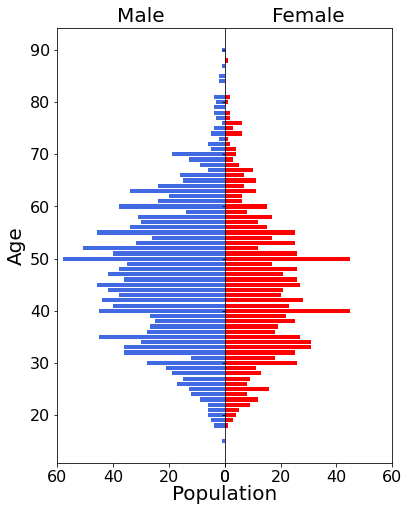

In [3]:
year=data.copy() # dataframe to see distribution of calls by age and genre
year.dropna(subset=['Date de naissance','Sexe'],inplace=True) # drop empty values of sex and birth date 
year.rename(columns={'Date de naissance':'Age'},inplace=True)
year['Age']=2020-year['Age'].map(lambda x: x.year) # calculate age based on birth date
year=year[year['Age']>=15]  # only people older than 15 will be considered 
age=year.groupby(['Age','Sexe']).size().to_frame()
age.columns=['Counts']

x_male=age.xs('Mâle',level=1).index # male age
y_male=age.xs('Mâle',level=1).iloc[:,0] # male counts

x_female=age.xs('Femelle',level=1).index # female age
y_female=age.xs('Femelle',level=1).iloc[:,0] # female counts

def piramid(x1,y1,x2,y2):
    fig,ax=plt.subplots(ncols=2,sharey=True,figsize=(6,8))
    plt.subplots_adjust(wspace = 0)
    ax[0].barh(x1, y1, align='center', color='royalblue')
    ax[0].set_title('Male',fontsize=20)
    ax[0].set_xlim([0,60])
    ax[0].invert_xaxis()
    ax[1].barh(x2,y2, align='center', color='red')
    ax[1].set_title('Female',fontsize=20)
    ax[1].set_xlim([0,60])
     
    ax[0].set_xlabel('Population',size=20)
    ax[0].xaxis.set_label_coords(1., -0.05)
    ax[0].set_ylabel('Age',size=20)
    
    ax[0].tick_params(axis='both',labelsize=16)
    ax[1].tick_params(axis='both',labelsize=16)

piramid(x_male,y_male,x_female,y_female)

In [7]:
A=year[year['Sexe'].str.contains('Femelle')& year['Region'].str.contains('Corpo')] # get information considering genre and location
a=A['Age'].mean(axis=0)
b=A['Age'].mode()
c=A['Age'].median(axis=0)

print('mean: '+str(a),'\n','mode: '+str(b),'\n','median: '+str(c))


mean: 44.813397129186605 
 mode: 0    55
dtype: int64 
 median: 45.0


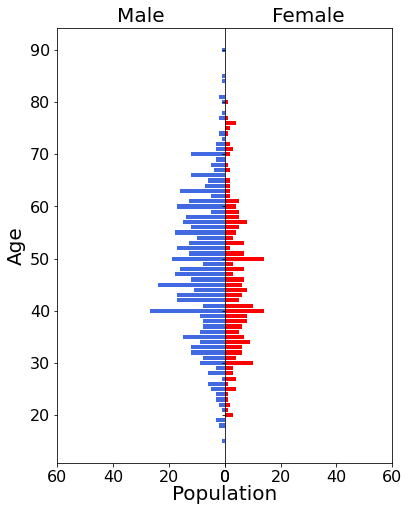

In [381]:
age_r=year.groupby(['Age','Sexe','Region']).size().to_frame() #group data by age, genre and region
age_r.columns=['Count']
age_r.reset_index(level=['Region'],inplace=True)

age_TM=age_r[age_r['Region'].str.contains('Tierra')] # data from region Tierra Muscady

piramid(age_TM.xs('Mâle',level=1).index,age_TM.xs('Mâle',level=1).iloc[:,1],age_TM.xs('Femelle',level=1).index,age_TM.xs('Femelle',level=1).iloc[:,1])



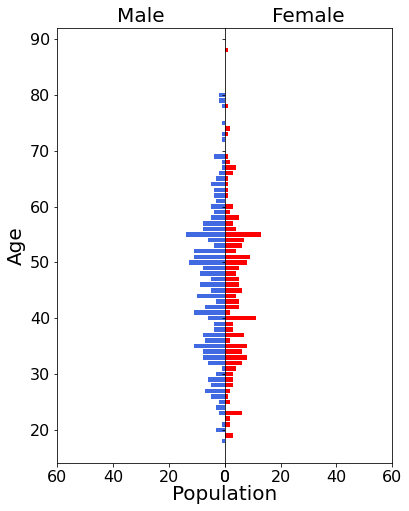

In [417]:
age_CP=age_r[age_r['Region'].str.contains('Corporant')] # data from region Corporant

piramid(age_CP.xs('Mâle',level=1).index,age_CP.xs('Mâle',level=1).iloc[:,1],age_CP.xs('Femelle',level=1).index,age_CP.xs('Femelle',level=1).iloc[:,1])


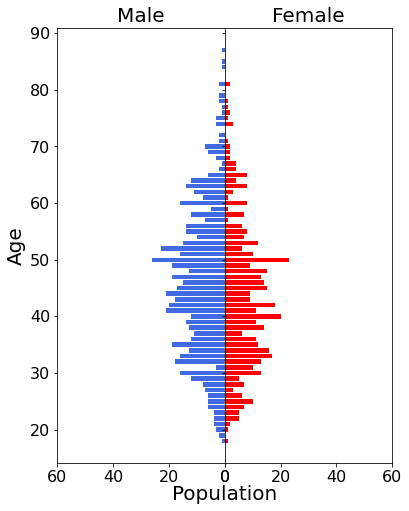

In [383]:
age_LaC=age_r[age_r['Region'].str.contains('La')]  # data from LaChapelle

piramid(age_LaC.xs('Mâle',level=1).index,age_LaC.xs('Mâle',level=1).iloc[:,1],age_LaC.xs('Femelle',level=1).index,age_LaC.xs('Femelle',level=1).iloc[:,1])


In [363]:
ID=data.copy()  # see if people called once or more, considering region
ID.dropna(subset=['Date de naissance','Sexe'],inplace=True)
ID=ID.groupby(['Nom','Date de naissance','Sexe','Region']).size().to_frame() # groupby name, birth date, genre and region
ID.columns=['Counts']

ID1=ID[ID['Counts']>=2] # people who called more than once
ID1=ID1.groupby('Region').count()

ID2=ID[ID['Counts']==1] # people who called once
ID2=ID2.groupby('Region').count()

print(ID1, ID2)


                Counts
Region                
Corporant            4
LaChapelle           3
Tierra Muscady       2                 Counts
Region                
Corporant          493
LaChapelle        1072
Tierra Muscady     827


Sexe
Femelle       1046
Mâle          1731
Not stated     295
dtype: int64

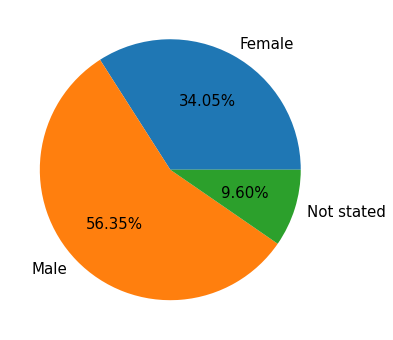

In [439]:
data['Sexe'].fillna('Not stated',inplace=True)
sex=data.groupby('Sexe').size() # amount of calls by genre
sex.plot.pie(ylabel='',labels=['Female','Male','Not stated'],fontsize=15,autopct="%.2f%%",figsize=(6,6))
sex

Region
Corporant          549
LaChapelle        1566
Tierra Muscady     957
dtype: int64

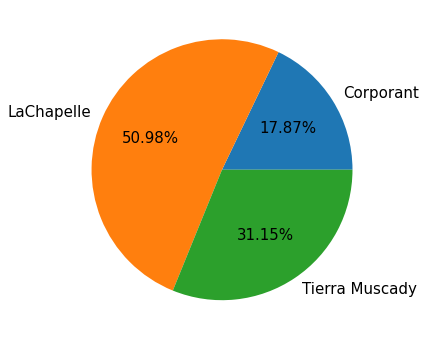

In [365]:
region=data.groupby('Region').size() # amount of calls by region
region.plot.pie(ylabel='',fontsize=15,autopct="%.2f%%",figsize=(6,6))
region

In [496]:
data2=pd.read_excel('covid_calls_haiti.xlsx',sheet_name='Dataset-Logs')
data2

,requestType,inbound,outbound,sendAt,doneAt,destination,externalMessageId,status,error,errorGroup
0,SMS,NaN,X,30/04/2021 07:10:04,30/04/2021 07:10:08,419345934583,31978460438503596223,Undeliverable,SM Delivery Failure (code 32),Handset Errors
1,SMS,NaN,X,30/04/2021 07:10:04,30/04/2021 07:10:08,59748625534,31978460469303596235,Undeliverable,SM Delivery Failure (code 32),Handset Errors
2,SMS,NaN,X,30/04/2021 07:10:04,30/04/2021 07:41:51,42420502060,31978460398703573595,Delivered,No Error (code 0),No Errors
3,SMS,NaN,X,30/04/2021 07:10:05,30/04/2021 07:10:05,5943214386,31978460534903598445,Undeliverable,Unknown Subscriber (code 1),Handset Errors
4,SMS,NaN,X,30/04/2021 07:10:05,30/04/2021 07:10:06,5933245649,31978460588703572818,Undeliverable,Unknown Subscriber (code 1),Handset Errors
...,...,...,...,...,...,...,...,...,...,...
3066,SMS,NaN,X,30/04/2021 11:20:30,30/04/2021 11:20:31,37437553,31979963078103573315,Expired,Call Barred (code 13),Handset Errors
3067,SMS,NaN,X,30/04/2021 11:20:30,30/04/2021 11:20:34,43241580,31979963017103597623,Undeliverable,SM Delivery Failure (code 32),Handset Errors
3068,SMS,NaN,X,30/04/2021 11:20:31,30/04/2021 11:20:35,32146970,31979963132403573325,Undeliverable,SM Delivery Failure (code 32),Handset Errors
3069,SMS,NaN,X,30/04/2021 11:20:31,30/04/2021 11:20:38,36441950,31979963190903574003,Delivered,No Error (code 0),No Errors


status
Delivered        1328
Expired           101
Pending           225
Rejected          175
Undeliverable    1242
dtype: int64

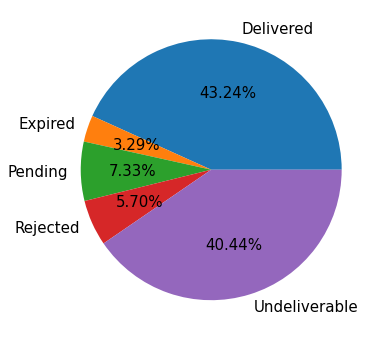

In [446]:
C=data2.groupby('status').size() 
C.plot.pie(ylabel='',fontsize=15,autopct="%.2f%%",figsize=(6,6))
C

C:\Users\Andre\AppData\Local\Temp/ipykernel_2144/648163681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['error'][mask]='Other errors'


array([<AxesSubplot:>], dtype=object)

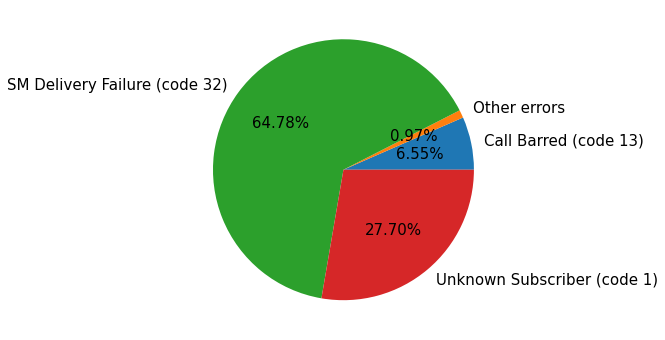

In [495]:
D=data2[~data2['error'].str.contains('No Error')]
D=D.groupby('error').size().to_frame()
D.columns=['Counts']
D.reset_index(inplace=True)
mask=(D['Counts']<10)
D['error'][mask]='Other errors'
D=D.groupby('error').sum()
D.plot.pie(ylabel='',fontsize=15,autopct="%.2f%%",figsize=(6,6),subplots=True,legend=False)


In [453]:
E=data2[data2['error'].str.contains('No Error') & ~data2['status'].str.contains('Delivered') ]
E

,requestType,inbound,outbound,sendAt,doneAt,destination,externalMessageId,status,error,errorGroup
17,SMS,NaN,X,30/04/2021 07:10:09,--,1305219779,31978460962703597756,Pending,No Error (code 0),No Errors
24,SMS,NaN,X,30/04/2021 07:10:11,30/04/2021 07:10:11,784625845,31978461117803598585,Rejected,No Error (code 0),No Errors
31,SMS,NaN,X,30/04/2021 07:10:13,30/04/2021 07:10:13,478913578,31978461379403598643,Rejected,No Error (code 0),No Errors
34,SMS,NaN,X,30/04/2021 07:10:14,--,451237881,31978461491903597905,Pending,No Error (code 0),No Errors
41,SMS,NaN,X,30/04/2021 07:10:16,--,412500304,31978461665903596588,Pending,No Error (code 0),No Errors
79,SMS,NaN,X,30/04/2021 07:10:27,30/04/2021 07:10:27,78425635,31978462730703571553,Rejected,No Error (code 0),No Errors
83,SMS,NaN,X,30/04/2021 07:10:28,--,74321867,31978462843003571582,Pending,No Error (code 0),No Errors
86,SMS,NaN,X,30/04/2021 07:10:29,--,71354586,31978462901603573203,Pending,No Error (code 0),No Errors
97,SMS,NaN,X,30/04/2021 07:10:32,30/04/2021 07:10:32,52321452,31978463217703571698,Rejected,No Error (code 0),No Errors
100,SMS,NaN,X,30/04/2021 07:10:33,30/04/2021 07:10:33,49994240,31978463386503574782,Rejected,No Error (code 0),No Errors
